In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
%matplotlib inline

### Define input data and output data

In [5]:
# freq = 2
# train_X = np.array([[0.7722,0.4380,0.1117,0.0305],[-0.8456,0.6876,0.4075,0.1525],[0.1117,0.0305,0.8839,0.4686],[0.4075,0.1525,-0.4380,0.8401]], dtype=np.float32)
# freq = 100
# train_X = np.array([[0.9999,0.0100,0.0000,0.0000],[-0.0200,0.9979,0.0100,0.0010],[ 0.0000,0.0000,1.0000,0.0100],[0.0100,0.0010,-0.0100,0.9990]], dtype=np.float32)
# freq = 10
train_X = np.array([[0.9901,0.0987,0.0049,0.0007],[-0.1967,0.9704,0.0980,0.0147],[0.0049,0.0007,0.9950,0.0993],[0.0980,0.0147,-0.0987,0.9852]], dtype=np.float32)
train_y = np.zeros([1, 4], dtype=np.float32)
train_X = train_X.reshape(1,16)
train_mask_X = np.array([[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,]])
print(train_X)
print(train_X.shape)
print(train_y.shape)
print(train_mask_X.shape)

[[ 9.901e-01  9.870e-02  4.900e-03  7.000e-04 -1.967e-01  9.704e-01
   9.800e-02  1.470e-02  4.900e-03  7.000e-04  9.950e-01  9.930e-02
   9.800e-02  1.470e-02 -9.870e-02  9.852e-01]]
(1, 16)
(1, 4)
(1, 16)


### Define neural network

In [14]:
X = tf.placeholder("float", [None, 16])
y = tf.placeholder("float", [None, 4])
mask_X = tf.placeholder("float", [None, 16])
biases = {
    'out': tf.Variable(tf.random_normal([16]))
}
temp_x = tf.multiply(biases['out'], mask_X)
temp_y = tf.add(X, temp_x)
[e, v] = tf.linalg.eigh(tf.reshape(temp_y, [4,4]))
pred_y = tf.abs(e)

### Define the loss function

In [15]:
loss_op = tf.reduce_mean(tf.abs(pred_y))

### Define optimizer

In [16]:
lr = 0.1
optimizer = tf.train.AdadeltaOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss_op)

### Training

In [27]:
training_step = 50000
loss_collect = []
para = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(training_step):
        sess.run(train_op, feed_dict={X:train_X, y:train_y, mask_X:train_mask_X})
        er = sess.run(loss_op, feed_dict={X:train_X, y:train_y, mask_X:train_mask_X})
        loss_collect.append(er)
        if step == training_step-1:
            para = sess.run(biases['out'])
para

array([-0.98987955, -0.53995013, -0.42816487,  0.46444225,  0.19670008,
        1.1013811 ,  0.7257584 ,  0.41285846, -0.0049239 ,  2.2134578 ,
       -0.99475557,  0.7952067 , -0.09799996, -0.5411845 ,  0.0987106 ,
       -0.08712932], dtype=float32)

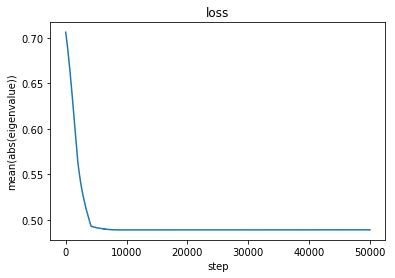

In [28]:
x_dot = np.linspace(0, training_step, training_step)
plt.plot(x_dot, loss_collect)
plt.title('loss')
plt.xlabel('step')
plt.ylabel('mean(abs(eigenvalue))')
plt.show()

In [29]:
para = para.reshape(4,4)
para[:, 1] = 0
para[:, 3] = 0
para

array([[-0.98987955,  0.        , -0.42816487,  0.        ],
       [ 0.19670008,  0.        ,  0.7257584 ,  0.        ],
       [-0.0049239 ,  0.        , -0.99475557,  0.        ],
       [-0.09799996,  0.        ,  0.0987106 ,  0.        ]],
      dtype=float32)

In [30]:
A = train_X.reshape(4,4)
A

array([[ 9.901e-01,  9.870e-02,  4.900e-03,  7.000e-04],
       [-1.967e-01,  9.704e-01,  9.800e-02,  1.470e-02],
       [ 4.900e-03,  7.000e-04,  9.950e-01,  9.930e-02],
       [ 9.800e-02,  1.470e-02, -9.870e-02,  9.852e-01]], dtype=float32)

In [31]:
A_bar = A + para
A_bar

array([[ 2.2047758e-04,  9.8700002e-02, -4.2326486e-01,  6.9999998e-04],
       [ 7.4505806e-08,  9.7039998e-01,  8.2375836e-01,  1.4700000e-02],
       [-2.3900066e-05,  6.9999998e-04,  2.4443865e-04,  9.9299997e-02],
       [ 3.7252903e-08,  1.4700000e-02,  1.0602176e-05,  9.8519999e-01]],
      dtype=float32)

In [32]:
import scipy.linalg as lin
[eigvalue, eigvec] = lin.eig(A_bar)
for i in eigvalue:
    print("eig: ", i)
print(np.mean(np.abs(eigvalue)))

eig:  (-0.0029363134+0j)
eig:  (0.0040677297+0j)
eig:  (0.93876714+0j)
eig:  (1.0161673+0j)
0.4904846


In [33]:
a = np.zeros([8], dtype=np.float32)
c = 0
for i in para.reshape(-1,1):
    if(i[0]!=0):
        a[c] = i[0]
        c+=1

In [35]:
a

array([-0.98987955, -0.42816487,  0.19670008,  0.7257584 , -0.0049239 ,
       -0.99475557, -0.09799996,  0.0987106 ], dtype=float32)